## Option 2: Income, Adj-ed price (features: 'bed', 'bath', 'house_size', 'income')

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [3]:
# Read Cali Income by Zip 
file_path = Path("Resources/NY_ZIP_Income.csv")
df_ny_incomes = pd.read_csv(file_path, header=0)
# Display sample data
df_ny_incomes.head(10)

,zip_code,income
0,10001,92840
1,10002,36982
2,10003,118161
3,10004,190223
4,10005,189702
5,10006,179044
6,10007,224063
7,10009,63717
8,10010,132988
9,10011,138272


In [5]:
# Read realtor data
file_path = Path("Resources/realtor-data.csv")
df_realtor = pd.read_csv(file_path)
# Display sample data
df_realtor.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [6]:
joined_df = pd.merge(df_ny_incomes, df_realtor, on='zip_code')
joined_df.head(10)

,zip_code,income,status,bed,bath,acre_lot,city,state,house_size,prev_sold_date,price
0,10001,92840,for_sale,2.0,2.0,NaN,New York City,New York,1200.0,NaN,1775000.0
1,10001,92840,for_sale,2.0,3.0,NaN,New York,New York,1459.0,4/26/16,2685000.0
2,10001,92840,for_sale,1.0,1.0,NaN,New York,New York,NaN,8/11/00,1295000.0
3,10001,92840,for_sale,2.0,3.0,NaN,New York,New York,1459.0,3/15/16,2700000.0
4,10001,92840,for_sale,3.0,3.0,NaN,New York,New York,2133.0,8/2/21,4800000.0
5,10001,92840,for_sale,3.0,4.0,NaN,New York,New York,2652.0,NaN,7995000.0
6,10001,92840,for_sale,3.0,4.0,NaN,New York,New York,2724.0,NaN,6950000.0
7,10001,92840,for_sale,1.0,2.0,NaN,New York,New York,1661.0,7/8/04,1988888.0
8,10001,92840,for_sale,NaN,1.0,NaN,New York City,New York,530.0,7/5/16,879995.0
9,10001,92840,for_sale,2.0,2.0,NaN,New York,New York,1351.0,10/2/13,2895000.0


In [7]:
joined_df3 = joined_df.loc[:,["zip_code","income", "status", "bed", "bath", "city", "state", "house_size", "prev_sold_date", "price" ]]

In [8]:
joined_df3.head()

,zip_code,income,status,bed,bath,city,state,house_size,prev_sold_date,price
0,10001,92840,for_sale,2.0,2.0,New York City,New York,1200.0,NaN,1775000.0
1,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,4/26/16,2685000.0
2,10001,92840,for_sale,1.0,1.0,New York,New York,NaN,8/11/00,1295000.0
3,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,3/15/16,2700000.0
4,10001,92840,for_sale,3.0,3.0,New York,New York,2133.0,8/2/21,4800000.0


In [9]:
joined_df3['prev_sold_date']=pd.to_datetime(joined_df3['prev_sold_date'])
joined_df3['inflation_adj_factor']=1.03**(2023-joined_df3['prev_sold_date'].dt.year)
joined_df3['price_adj']=joined_df3['inflation_adj_factor']*joined_df3['price']

In [10]:
joined_df3.head()

,zip_code,income,status,bed,bath,city,state,house_size,prev_sold_date,price,inflation_adj_factor,price_adj
0,10001,92840,for_sale,2.0,2.0,New York City,New York,1200.0,NaT,1775000.0,NaN,NaN
1,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-04-26,2685000.0,1.229874,3.302211e+06
2,10001,92840,for_sale,1.0,1.0,New York,New York,NaN,2000-08-11,1295000.0,1.973587,2.555795e+06
3,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-03-15,2700000.0,1.229874,3.320659e+06
4,10001,92840,for_sale,3.0,3.0,New York,New York,2133.0,2021-08-02,4800000.0,1.060900,5.092320e+06


In [11]:
# Clean the Realtor data
clean_df =  joined_df3.dropna()
clean_df.head()

,zip_code,income,status,bed,bath,city,state,house_size,prev_sold_date,price,inflation_adj_factor,price_adj
1,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-04-26,2685000.0,1.229874,3.302211e+06
3,10001,92840,for_sale,2.0,3.0,New York,New York,1459.0,2016-03-15,2700000.0,1.229874,3.320659e+06
4,10001,92840,for_sale,3.0,3.0,New York,New York,2133.0,2021-08-02,4800000.0,1.060900,5.092320e+06
7,10001,92840,for_sale,1.0,2.0,New York,New York,1661.0,2004-07-08,1988888.0,1.753506,3.487527e+06
9,10001,92840,for_sale,2.0,2.0,New York,New York,1351.0,2013-10-02,2895000.0,1.343916,3.890638e+06


In [12]:
clean_df.size

680100

In [13]:
# Define target vector
y = clean_df["price_adj"].ravel()
y[:5]

array([3302211.32866578, 3320659.43664715, 5092320.        ,
       3487527.14689241, 3890637.91820123])

In [14]:
# Define features set
# X = clean_df.drop(columns=['price', 'prev_sold_date', 'status', 'state', 'city', 'zip_code', 'income'])
X=clean_df[['bed', 'bath', 'house_size', 'income']]
X.head()

,bed,bath,house_size,income
1,2.0,3.0,1459.0,92840
3,2.0,3.0,1459.0,92840
4,3.0,3.0,2133.0,92840
7,1.0,2.0,1661.0,92840
9,2.0,2.0,1351.0,92840


In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [17]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [18]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Create the random forest classifier instance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [22]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 126090.17175187368
MSE: 6549272773988.072
RMSE: 2559154.6991122034
R^2: 0.9686139741744118


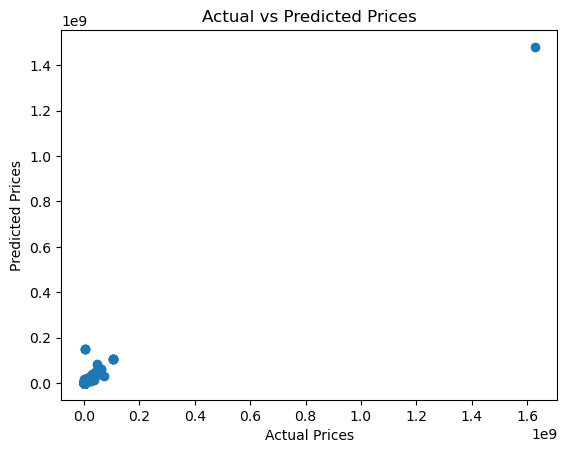

In [23]:
# Plot actual vs predicted
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [24]:
sorted(list(zip(rf_model.feature_importances_, X.columns)), reverse=True)

[(0.40378533721040877, 'house_size'),
 (0.267218957461524, 'bed'),
 (0.21232111409603613, 'income'),
 (0.11667459123203094, 'bath')]